# **Python数据分析可视化**

### **O前期准备： 安装库，配置环境** 

需要这些库：<br>
1. **matplotlib**：python中自带的，也是最常用的可视化工具包，在Jupyter中甚至可以找到matplotlib的网站<br>
2. **seaborn**：python中可视化的新起之秀，致力于统计数据可视化<br>
3. **brewer2mpl**：brewer2mpl是一个专供python使用的，用于访问colorbrewer2色谱的工具，colorbrewer2是一个专业颜色顾问公司
4. **sklearn**版本太低已升级0.22.1，pip install -U scikit-learn -i http://pypi.douban.com/simple --trusted-host pypi.douban.com升级
5. **github**访问不了，改host文件//所有数据都从data/中提取

In [3]:
import sys
import seaborn as sns
import matplotlib as mlp
print(sns.__version__)
print(mlp.__version__)

#Python版本
sys.version

0.9.0
3.0.3


'3.7.1 (default, Oct 28 2018, 08:39:03) [MSC v.1912 64 bit (AMD64)]'

## **第一章 关联图 Correlation**

关联图是查找两个事物之间关系的图像，它能够为我们展示出一个事物随着另一个事物的变化如何变化<br>
典型的关联图有：折线图，散点图，相关矩阵……

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/%E5%85%B3%E8%81%94%E5%9B%BE%E5%85%B8%E5%9E%8B.PNG" align="center" />

### 关联图用处？
1. 数据报告 & 学术研究：<br>
>展示趋势：比如产品销量随着时间如何变化，智力水平随着教育程度如何变化等<br>
>展现状态：不同年龄的客户的成交率，不同生产成本对应的生产员工技能要求
2. 数据探索 & 数据解读：<br>
>探索数据关系，帮助了解事实，推动研究<br>
3. 统计学 & 机器学习：<br>
> 探索数据关系，指导数据预处理和模型选择<br>

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

## 第一期 关联图：01 散点图 & 02 气泡图

## o新知识点

1.plt.scatter()  # 简单绘画散点图

2.plt.cm.tab10(5.2)   # 取一种颜色

3.np.array(color1).reshape(1,-1)  # 行数变为一,不用在意列数多少，方便

4.colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

5.
plt.rcParams # 默认内容
plt.style.use('seaborn-whitegrid') # 风格
sns.set_style("white") # 底色

6.plt.scatter('area', 'poptotal', data=……,）   # 简化

7.data.iloc[:,-3:] = OE().fit_transform(data.iloc[:,-3:]) # 标签转换为数字

8.data.info()

9.data = data.loc[:,data.dtypes.values != "O"]

10.coeff.sort_values(by="mean",ascending=False)

11.plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),xlabel='Area', ylabel='Population')

12.p = np.c_[x,y] #.c_功能类似于zip，不过不是生成组合的元祖，而是生成拼接起来的数组array

13.hull = ConvexHull(p) #将数据集输入到ConvexHull中，自动生成凸包类型的对象,点集

14.ax.add_patch(poly) #使用add_patch，将生成的多边形作为一个补丁补充到图像上

15.plt.text()

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

### 01/50 散点图

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/%E6%95%A3%E7%82%B9%E5%9B%BE.PNG" align="center" />

横坐标：面积大小<br>
总坐标：总人口<br>
图例：暂时看不出是什么总而言之看起来是类型，一种类型一个颜色

### **我们的目标是：绘制出这张图，并且利用数据解读图内的信息**

### 1. 导入需要的绘图库

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl  # 画二维图
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#如果你在使用Jupyter Notebook，你会需要这样一句命令来让你的图像显示

### 2. 绘制散点图的函数

#### **plt.scatter()**

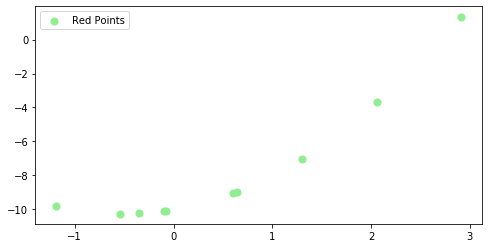

In [24]:
#绘制超简单的散点图：变量x1与x2的关系

#定义数据
x1 = np.random.randn(10) #取随机数
x2 = x1 + x1**2 - 10

#确定画布 - 当只有一个图的时候，不是必须存在
plt.figure(figsize=(8,4))

#绘图
plt.scatter(x1,x2 #横坐标，纵坐标
            ,s=50 #数据点的尺寸大小
            ,c="lightgreen" #数据点的颜色
            ,label = "Red Points"  #标签
           )
#装饰图形
plt.legend() #显示图例,有label参数时，左上角显示label

plt.show() #让图形显示

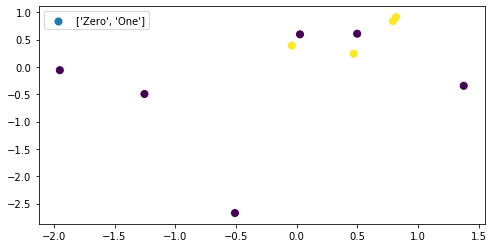

In [7]:
#除了两列X之外，还有标签y的存在(类别)
#在机器学习中，我们经常有使用标签 y 作为颜色来观察两种类别的分布的需求

X = np.random.randn(10,2) #10行，2列的数据集
y = np.array([0,0,1,1,0,1,0,1,0,0]) # 自选颜色

plt.figure(figsize=(8,4))

plt.scatter(X[:,0],X[:,1] #横坐标，纵坐标
            ,s=50
            ,c=y #分类能够被可视化
            ,label = ["Zero","One"]
           )

plt.legend()  # 图例只有一个，由于label只有一个string
plt.show()

In [25]:
X

array([[-1.9506972 , -0.05887611],
       [ 1.37682288, -0.34425997],
       [-0.03916534,  0.3909056 ],
       [ 0.7933782 ,  0.84006652],
       [-0.5080384 , -2.67216893],
       [ 0.81903945,  0.9120724 ],
       [ 0.49887672,  0.60911644],
       [ 0.47046549,  0.24326795],
       [-1.25334814, -0.49385175],
       [ 0.02782917,  0.59739254]])

In [26]:
X[:,0]  # X点x坐标

X[:,1]  # X点y坐标


array([-1.9506972 ,  1.37682288, -0.03916534,  0.7933782 , -0.5080384 ,
        0.81903945,  0.49887672,  0.47046549, -1.25334814,  0.02782917])

#### 【核心知识点】可视化分类标签时的图例
你是否注意到了？<br>
如果我们希望显示多种颜色的散点图，并且这个颜色是我们的标签y所代表的分类，那我们**无法**让散点图显示分别代表不同颜色的图例<br>
那我们应该怎么办呢？

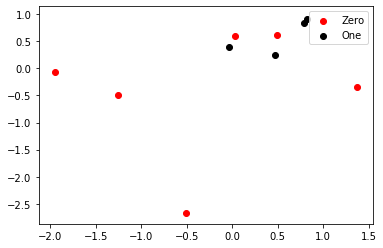

In [29]:
colors = ["red","black"] #确立颜色列表
labels = ["Zero","One"] #确立标签的类别列表


# 加循环
for i in range(X.shape[1]):  # X.shape[1]==2
    plt.scatter(X[y==i,0],
               X[y==i,1],
               c=colors[i],
               label = labels[i])

#在标签中存在几种类别，我们就需要循环几次，一次画一个颜色的点

plt.legend(loc='best')
plt.show()

In [30]:
X[y == 0] # 紫色点 y == 0 筛选点

array([[-1.9506972 , -0.05887611],
       [ 1.37682288, -0.34425997],
       [-0.5080384 , -2.67216893],
       [ 0.49887672,  0.60911644],
       [-1.25334814, -0.49385175],
       [ 0.02782917,  0.59739254]])

In [31]:
X.shape

(10, 2)

In [32]:
y

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0])

In [67]:
X[y==0,0] #标签为0的所有数据的横坐标

array([ 1.20603652, -0.89226683,  1.09811262,  1.89934612, -0.21424534,
        1.58023304])

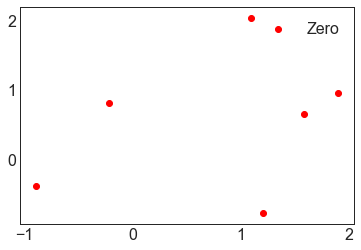

In [68]:
plt.scatter(X[y==0,0],X[y==0,1],c="red",label = "Zero")
plt.legend()

现在我们只需要找到三个因素：
1. 绘图用数据x1和x2<br>
2. 标签的列表<br>
3. 颜色

### 3. 开始认识绘图所需要的数据

In [40]:
#导入数据
midwest = pd.read_csv("data/midwest_filter.csv")
#github上的数据,有时无法下载，直接data文件导入

In [41]:
#探索数据

In [42]:
midwest.shape  # 看规模

(332, 29)

In [43]:
midwest.head() # 看一看组成

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU,319.823487
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR,130.442161


In [44]:
midwest.columns  # 标签

Index(['PID', 'county', 'state', 'area', 'poptotal', 'popdensity', 'popwhite',
       'popblack', 'popamerindian', 'popasian', 'popother', 'percwhite',
       'percblack', 'percamerindan', 'percasian', 'percother', 'popadults',
       'perchsd', 'percollege', 'percprof', 'poppovertyknown',
       'percpovertyknown', 'percbelowpoverty', 'percchildbelowpovert',
       'percadultpoverty', 'percelderlypoverty', 'inmetro', 'category',
       'dot_size'],
      dtype='object')

In [45]:
#翻译了一下：
["城市ID","郡","州","面积","总人口","人口密度","白人人口","非裔人口","美洲印第安人人口","亚洲人口","其他人种人口"
,"白人所占比例","非裔所占比例","美洲印第安人所占比例","亚洲人所占比例","其他人种比例"
,"成年人口","具有高中文凭的比率","大学文凭比例","有工作的人群比例"
,"已知贫困人口","已知贫困人口的比例","贫困线以下的人的比例","贫困线以下的儿童所占比例","贫困的成年人所占的比例","贫困的老年人所占的比例"
,"是否拥有地铁","标签","点的尺寸"]

['城市ID',
 '郡',
 '州',
 '面积',
 '总人口',
 '人口密度',
 '白人人口',
 '非裔人口',
 '美洲印第安人人口',
 '亚洲人口',
 '其他人种人口',
 '白人所占比例',
 '非裔所占比例',
 '美洲印第安人所占比例',
 '亚洲人所占比例',
 '其他人种比例',
 '成年人口',
 '具有高中文凭的比率',
 '大学文凭比例',
 '有工作的人群比例',
 '已知贫困人口',
 '已知贫困人口的比例',
 '贫困线以下的人的比例',
 '贫困线以下的儿童所占比例',
 '贫困的成年人所占的比例',
 '贫困的老年人所占的比例',
 '是否拥有地铁',
 '标签',
 '点的尺寸']

### 4. 准备标签的列表和颜色

#### 标签

In [75]:
midwest['category']  # 标签，种类

0      AAR
1      LHR
2      AAR
3      ALU
4      AAR
5      AAR
6      LAR
7      AAR
8      AAR
9      AAR
10     AAR
11     LAR
12     LAU
13     AAR
14     AAR
15     AAR
16     HAU
17     AAR
18     AAR
19     AAR
20     AAR
21     AAR
22     AAR
23     AAR
24     LHR
25     AAR
26     LHR
27     AAR
28     ALU
29     LHR
      ... 
302    AAR
303    AAR
304    AAR
305    AAR
306    AAR
307    LHR
308    AAR
309    AAR
310    AAR
311    HLU
312    AAR
313    HAU
314    AAR
315    AAR
316    AAR
317    AAR
318    AAR
319    HLU
320    AAR
321    AHR
322    AAR
323    AAR
324    AAR
325    AAR
326    AAR
327    AAR
328    AAR
329    AAR
330    AAR
331    AAR
Name: category, Length: 332, dtype: object

In [67]:
#提取标签中的类别
categories = np.unique(midwest['category'])  # 去掉所有重复的项  .midwest.category.unique()

categories #这就是我们要使用的标签的类别列表

In [78]:
len(categories)

14

#### 颜色

接下来要创造和标签的类别一样多的颜色<br>
如果只有三四个类别，或许我们还可以自己写<br>
然而面对十几个，或者二十个分类，我们需要让matplotlib来帮助我们自动生成颜色

### plt.cm.tab10()

用于创建颜色的十号光谱，在matplotlib中，有众多光谱供我们选择：https://matplotlib.org/tutorials/colors/colormaps.html<br>
我们可以在plt.cm.tab10()中输入任意浮点数，来提取出一种颜色<br>
光谱tab10中总共只有十种颜色，如果输入的浮点数比较接近，会返回类似的颜色<br>
这种颜色会以元祖的形式返回，表示为四个浮点数组成的RGBA色彩空间或者三个浮点数组成的RGB色彩空间中的随机色彩

In [46]:
color1 = plt.cm.tab10(5.2)

In [47]:
color1 #四个浮点数组成的一个颜色，A为饱和度

(0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


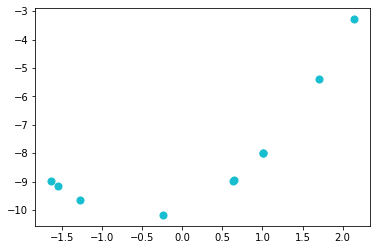

In [48]:
#这个颜色是什么颜色呢？

x1 = np.random.randn(10)           
x2 = x1 + x1**2 - 10
plt.scatter(x1,x2,s=50
            ,c=color1)
plt.show()

In [49]:
#展示除了类似于硫酸铜的蓝绿色，然而报了警告
#警告意思是需要序列

color1

(0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0)

In [83]:
np.array(color1).reshape(1,-1).shape

(1, 4)

In [84]:
np.array(color1).reshape(1,-1) #reshape：增维，输入(1,-1)是让行上的维度为1，(-1,1)是让列上的维度为1

array([[0.09019608, 0.74509804, 0.81176471, 1.        ]])

In [85]:
np.array(color1).reshape(-1,1)

array([[0.09019608],
       [0.74509804],
       [0.81176471],
       [1.        ]])

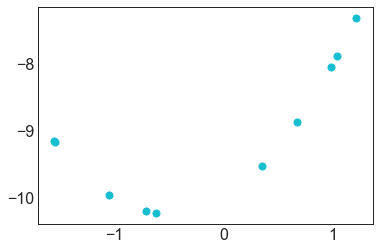

In [86]:
x1 = np.random.randn(10)
x2 = x1 + x1**2 - 10
plt.scatter(x1,x2,s=50
            ,c=np.array(color1).reshape(1,-1))
plt.show()

### 5. 生成基础的图像

In [50]:
midwest.head()

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU,319.823487
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR,130.442161


In [61]:
categories[13] #0~13

'AAR'

In [62]:
#取一个类别的"poptotal"
midwest.loc[midwest["category"] == categories[0],"poptotal"].head()  #poptotal总人口

0    66090
2    14991
4     5836
5    35688
7    16805
Name: poptotal, dtype: int64

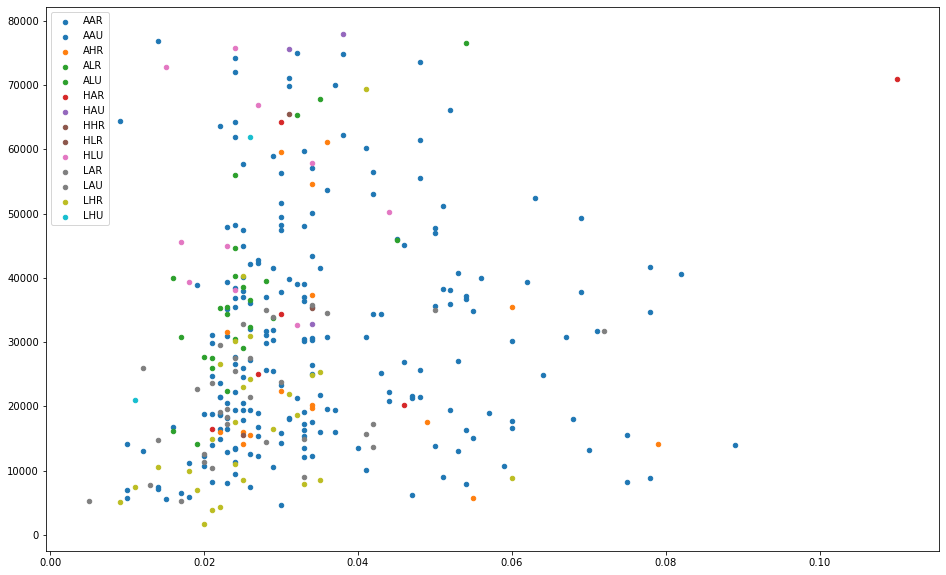

In [68]:
#为了标签的名称，我们本来就需要循环和标签的类别数目一样的次数
#所以需要循环的次数 = 需要生成的颜色的次数 = 需要生成的小数的个数
#只需要在循环中不断生成颜色就好了
#所以我们可以利用循环中的i来生成14个不同的小数

plt.figure(figsize=(16,10))

for i in range(len(categories)):
    plt.scatter(midwest.loc[midwest["category"]==categories[i],"area"] # 取一类的area
                ,midwest.loc[midwest["category"]==categories[i],"poptotal"]
                ,s=20
                ,c=np.array(plt.cm.tab10(i/len(categories))).reshape(1,-1)
                ,label=categories[i]
               )
plt.legend()
plt.show()

In [69]:
#当然了，也可以先创建好一个颜色的列表，然后使用索引来不断地将颜色提取出来

colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

#这是一个列表推倒式，其实它表达的内容和循环非常类似:

In [70]:
colors = []
for i in range(len(categories)):
    colors.append(plt.cm.tab10(i/float(len(categories)-1)))

In [71]:
colors

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 1.0),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0)]

In [72]:
plt.rcParams # 默认内容

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

In [74]:
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

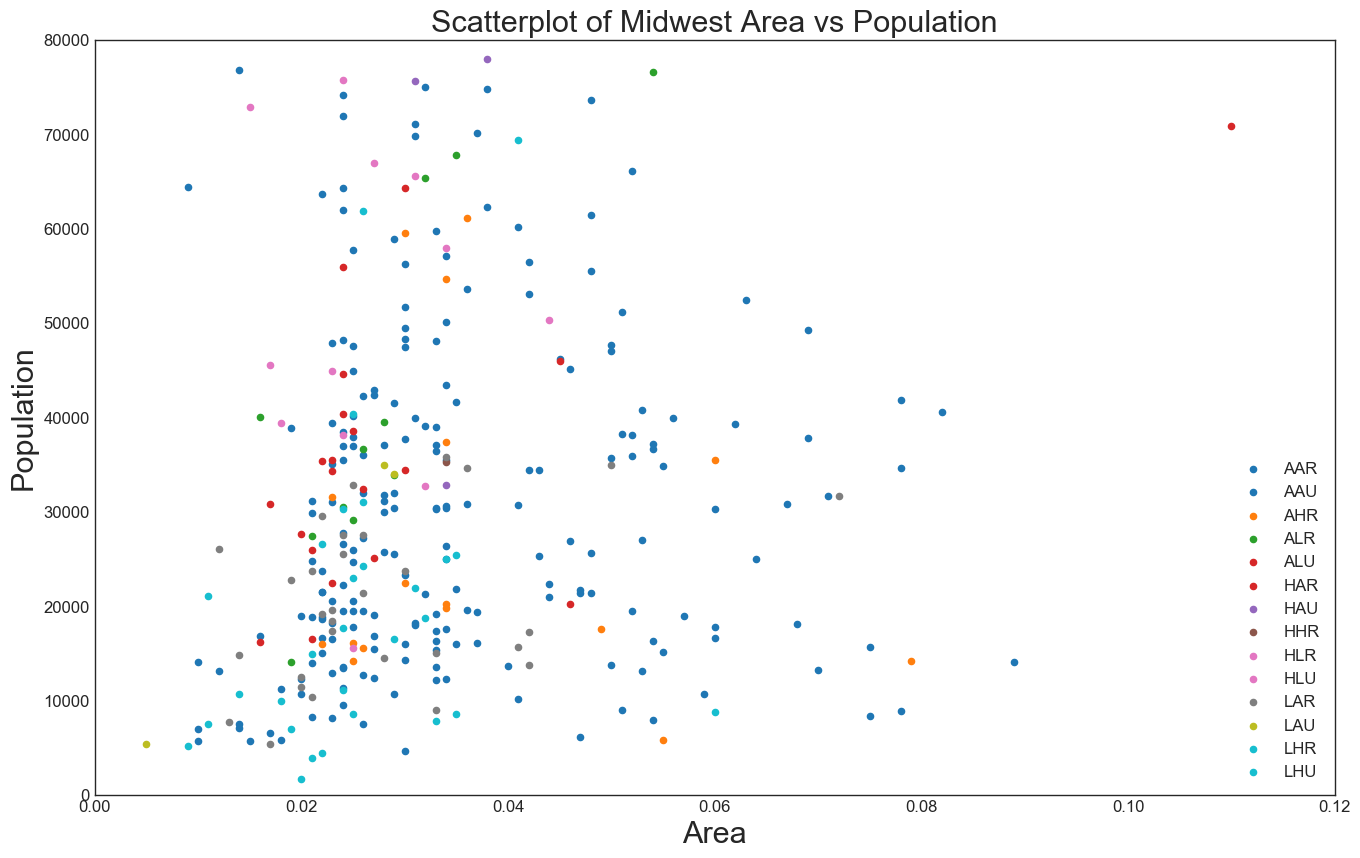

In [76]:
#丰富我们的图像

#预设图像的各种属性
large = 22; med = 16; small = 12
params = {'axes.titlesize': large, #子图上的标题字体大小
          'legend.fontsize': med, #图例的字体大小
          'figure.figsize': (16, 10), #图像的画布大小
          'axes.labelsize': med, #标签的字体大小
          'xtick.labelsize': med, #x轴上的标尺的字体大小
          'ytick.labelsize': med, #y轴上的标尺的字体大小
          'figure.titlesize': large} #整个画布的标题字体大小
plt.rcParams.update(params) #设定各种各样的默认属性

plt.style.use('seaborn-whitegrid') #设定整体风格  ——画格子，没有图例边框
sns.set_style("white") #设定整体背景风格

%matplotlib inline

#准备标签列表和颜色列表
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

#建立画布
plt.figure(figsize=(16, 10)   #绘图尺寸
           , dpi=100          #图像分辨率越大越清晰
           , facecolor='w'    #图像的背景颜色，设置为白色，默认也是白色
           , edgecolor='k'    #图像的边框颜色，设置为黑色，默认也是黑色，白色没边框，被风格覆盖了
          )

#循环绘图
for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', 
                data=midwest.loc[midwest.category==category, :], 
                s=20, c=np.array(colors[i]).reshape(1,-1)
                , label=str(category))

#注意到这里的数据获取方法和我们刚才写的不同了吗？
#我们不仅可以输入横纵坐标，也可以输入横纵坐标的名字，然后使用data这个参数来传入全数据集
#我们不仅可以循环i，还可以对i和category一同进行循环

#对图像进行装饰
#plt.gca() 获取当前的子图，如果当前没有任何子图的话，就帮我创建一个新的子图
plt.gca().set(xlim=(0, 0.12), ylim=(0, 80000)) #控制横纵坐标的范围
plt.xticks(fontsize=12) #坐标轴上的标尺的字的大小
plt.yticks(fontsize=12)
plt.ylabel('Population',fontsize=22) #坐标轴上的标题和字体大小
plt.xlabel('Area',fontsize=22)
plt.title("Scatterplot of Midwest Area vs Population", fontsize=22) #整个图像的标题和字体的大小
plt.legend(fontsize=12) #图例的字体大小 shift+Tab 找参数
plt.show()

## 核心

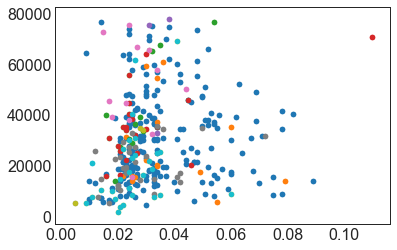

In [77]:
for i in range(len(categories)): #0~13
    plt.scatter(midwest.loc[midwest["category"]==categories[i],"area"]
                ,midwest.loc[midwest["category"]==categories[i],"poptotal"]
                ,s=20
                ,c=np.array(plt.cm.tab10(i/len(categories))).reshape(1,-1)
                ,label=categories[i]
               )


#循环绘图
for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', 
                data=midwest.loc[midwest.category==category, :],   # 简化
                s=20, c=np.array(colors[i]).reshape(1,-1), label=str(category))

#注意到这里的数据获取方法和我们刚才写的不同了吗？
#我们不仅可以输入横纵坐标，也可以输入横纵坐标的名字，然后使用data这个参数来传入全数据集
#我们不仅可以循环i，还可以对i和category一同进行循环

In [78]:
[*enumerate(categories)]  # 合成含标签索引

[(0, 'AAR'),
 (1, 'AAU'),
 (2, 'AHR'),
 (3, 'ALR'),
 (4, 'ALU'),
 (5, 'HAR'),
 (6, 'HAU'),
 (7, 'HHR'),
 (8, 'HLR'),
 (9, 'HLU'),
 (10, 'LAR'),
 (11, 'LAU'),
 (12, 'LHR'),
 (13, 'LHU')]

In [79]:
midwest["area"].max()

0.11

In [80]:
midwest["area"].min()

0.005

### 6. 解读图像

In [81]:
midwest.head()

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU,319.823487
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR,130.442161


In [82]:
midwest[midwest["area"] > 0.1]  # 异常值，可深入研究

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size
196,1248,MARQUETTE,MI,0.11,70887,644.427273,68027,1170,943,538,...,6.799415,66398,93.667386,12.608814,14.26216,11.84465,12.523891,0,HAR,171.19829


In [84]:
midwest["category"].value_counts()

AAR    186
LAR     30
LHR     27
AAU     21
AHR     16
ALU     14
ALR     11
HLU     10
HAR      6
HAU      3
LAU      3
HLR      2
LHU      2
HHR      1
Name: category, dtype: int64

In [83]:
midwest["category"].value_counts().index[0][2] #ARR进行切片

'R'

In [85]:
#切片，构造新属性
midwest["c1"] = midwest["category"].apply(lambda x:x[0])
midwest["c2"] = midwest["category"].apply(lambda x:x[1])
midwest["c3"] = midwest["category"].apply(lambda x:x[2])

In [86]:
midwest.head()

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size,c1,c2,c3
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411,A,A,R
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260,L,H,R
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385,A,A,R
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,7.209019,11.179536,5.536013,6.217047,1,ALU,319.823487,A,L,U
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,13.520249,13.022889,11.143211,19.200000,0,AAR,130.442161,A,A,R


In [87]:
midwest["c1"].value_counts() #average, high, low

A    248
L     62
H     22
Name: c1, dtype: int64

In [88]:
midwest["c2"].value_counts()

A    249
H     46
L     37
Name: c2, dtype: int64

In [89]:
midwest["c3"].value_counts() #rural, urban

R    279
U     53
Name: c3, dtype: int64

In [90]:
##看到这个结果，我有一个大胆的想法~如何验证我的猜测呢？我们来使用逻辑回归

## 逻辑回归探索数据

数据预处理

In [91]:
#先处理数据集，将我们取出来的三列标签转化为数字

from sklearn.preprocessing import OrdinalEncoder as OE
data = midwest.copy()

In [92]:
data.head()

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size,c1,c2,c3
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411,A,A,R
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260,L,H,R
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385,A,A,R
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,7.209019,11.179536,5.536013,6.217047,1,ALU,319.823487,A,L,U
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,13.520249,13.022889,11.143211,19.200000,0,AAR,130.442161,A,A,R


In [93]:
data.iloc[:,-3:].head()

,c1,c2,c3
0,A,A,R
1,L,H,R
2,A,A,R
3,A,L,U
4,A,A,R


In [94]:
data.iloc[:,-3:] = OE().fit_transform(data.iloc[:,-3:])  # 标签转换为数字

In [95]:
data.iloc[:,-3:].head() #average = 0,L=2,H=1 ，转换为标签

,c1,c2,c3
0,0.0,0.0,0.0
1,2.0,1.0,0.0
2,0.0,0.0,0.0
3,0.0,2.0,1.0
4,0.0,0.0,0.0


In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 32 columns):
PID                     332 non-null int64
county                  332 non-null object
state                   332 non-null object
area                    332 non-null float64
poptotal                332 non-null int64
popdensity              332 non-null float64
popwhite                332 non-null int64
popblack                332 non-null int64
popamerindian           332 non-null int64
popasian                332 non-null int64
popother                332 non-null int64
percwhite               332 non-null float64
percblack               332 non-null float64
percamerindan           332 non-null float64
percasian               332 non-null float64
percother               332 non-null float64
popadults               332 non-null int64
perchsd                 332 non-null float64
percollege              332 non-null float64
percprof                332 non-null float64
poppovertykno

In [99]:
data.columns = ["城市ID","郡","州","面积","总人口","人口密度","白人人口","非裔人口","美洲印第安人人口","亚洲人口","其他人种人口"
                   ,"白人所占比例","非裔所占比例","美洲印第安人所占比例","亚洲人所占比例","其他人种比例"
                   ,"成年人口","具有高中文凭的比率","大学文凭比例","有工作的人群比例"
                   ,"已知贫困人口","已知贫困人口的比例","贫困线以下的人的比例","贫困线以下的儿童所占比例","贫困的成年人所占的比例","贫困的老年人所占的比例"
                   ,"是否拥有地铁","标签","点的尺寸","c1","c2","c3"]

#去掉所有类型为"object"的列，都是无用的信息
data = data.loc[:,data.dtypes.values != "O"] #data.dtypes.values=0为object

In [100]:
data.loc[:,data.dtypes.values == "int64"] = data.loc[:,data.dtypes.values == "int64"]*1.0  
# 转换类型，也可.apply（lambda x:float(x)

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 29 columns):
城市ID            332 non-null float64
面积              332 non-null float64
总人口             332 non-null float64
人口密度            332 non-null float64
白人人口            332 non-null float64
非裔人口            332 non-null float64
美洲印第安人人口        332 non-null float64
亚洲人口            332 non-null float64
其他人种人口          332 non-null float64
白人所占比例          332 non-null float64
非裔所占比例          332 non-null float64
美洲印第安人所占比例      332 non-null float64
亚洲人所占比例         332 non-null float64
其他人种比例          332 non-null float64
成年人口            332 non-null float64
具有高中文凭的比率       332 non-null float64
大学文凭比例          332 non-null float64
有工作的人群比例        332 non-null float64
已知贫困人口          332 non-null float64
已知贫困人口的比例       332 non-null float64
贫困线以下的人的比例      332 non-null float64
贫困线以下的儿童所占比例    332 non-null float64
贫困的成年人所占的比例     332 non-null float64
贫困的老年人所占的比例     332 non-null float64
是否拥有地铁 

In [102]:
X = data.iloc[:,1:-3] #除了对象类的列，还有城市编号也是无用的信息，因此我们不把它作为特征矩阵的一部分
X.head()

,面积,总人口,人口密度,白人人口,非裔人口,美洲印第安人人口,亚洲人口,其他人种人口,白人所占比例,非裔所占比例,...,大学文凭比例,有工作的人群比例,已知贫困人口,已知贫困人口的比例,贫困线以下的人的比例,贫困线以下的儿童所占比例,贫困的成年人所占的比例,贫困的老年人所占的比例,是否拥有地铁,点的尺寸
0,0.052,66090.0,1270.961540,63917.0,1702.0,98.0,249.0,124.0,96.712059,2.575276,...,19.631392,4.355859,63628.0,96.274777,13.151443,18.011717,11.009776,12.443812,0.0,250.944411
1,0.014,10626.0,759.000000,7054.0,3496.0,19.0,48.0,9.0,66.384340,32.900433,...,11.243308,2.870315,10529.0,99.087145,32.244278,45.826514,27.385647,25.228976,0.0,185.781260
2,0.022,14991.0,681.409091,14477.0,429.0,35.0,16.0,34.0,96.571276,2.861717,...,17.033819,4.488572,14235.0,94.956974,12.068844,14.036061,10.852090,12.697410,0.0,175.905385
3,0.017,30806.0,1812.117650,29344.0,127.0,46.0,150.0,1139.0,95.254171,0.412257,...,17.278954,4.197800,30337.0,98.477569,7.209019,11.179536,5.536013,6.217047,1.0,319.823487
4,0.018,5836.0,324.222222,5264.0,547.0,14.0,5.0,6.0,90.198766,9.372858,...,14.475999,3.367680,4815.0,82.505140,13.520249,13.022889,11.143211,19.200000,0.0,130.442161


In [103]:
y = data.iloc[:,-3:]
y.head()

,c1,c2,c3
0,0.0,0.0,0.0
1,2.0,1.0,0.0
2,0.0,0.0,0.0
3,0.0,2.0,1.0
4,0.0,0.0,0.0


准备数据

In [105]:
#然后分训练集和测试集

from sklearn.model_selection import train_test_split as TTS
Xtrain, Xtest, Ytrain, Ytest = TTS(X,y,test_size=0.3,random_state=420)

In [106]:
Xtrain.head()

,面积,总人口,人口密度,白人人口,非裔人口,美洲印第安人人口,亚洲人口,其他人种人口,白人所占比例,非裔所占比例,...,大学文凭比例,有工作的人群比例,已知贫困人口,已知贫困人口的比例,贫困线以下的人的比例,贫困线以下的儿童所占比例,贫困的成年人所占的比例,贫困的老年人所占的比例,是否拥有地铁,点的尺寸
276,0.041,15682.0,382.487805,15001.0,375.0,125.0,56.0,125.0,95.657442,2.391277,...,12.427492,2.390578,14534.0,92.679505,14.435118,22.300831,13.310056,10.186757,0.0,137.858283
156,0.030,23265.0,775.500000,23127.0,2.0,50.0,41.0,45.0,99.406834,0.008597,...,16.583835,5.166100,22974.0,98.749194,7.704361,8.136567,6.168723,11.040340,0.0,187.881402
35,0.036,61067.0,1696.305560,51991.0,6342.0,109.0,2178.0,447.0,85.137636,10.385314,...,36.643665,14.089892,54230.0,88.804100,28.371750,26.392211,32.458483,13.815301,0.0,305.082769
161,0.031,18185.0,586.612903,17895.0,23.0,211.0,24.0,32.0,98.405279,0.126478,...,19.039803,5.014362,17942.0,98.663734,13.214803,18.758142,12.037542,9.681284,0.0,163.839599
321,0.079,14181.0,179.506329,11962.0,18.0,2167.0,15.0,19.0,84.352302,0.126930,...,17.947917,4.041667,13897.0,97.997320,20.544002,29.073570,19.195368,14.179318,0.0,112.022528


In [121]:
range(Xtrain.shape[0])  # 行数

range(0, 232)

In [122]:
#恢复索引  data.reset_index(drop=True, inplace=True)
for i in [Xtrain,Xtest,Ytrain,Ytest]:  # 每个数据集合都有索引
    i.index = range(i.shape[0])

In [123]:
Xtrain.head()

,面积,总人口,人口密度,白人人口,非裔人口,美洲印第安人人口,亚洲人口,其他人种人口,白人所占比例,非裔所占比例,...,大学文凭比例,有工作的人群比例,已知贫困人口,已知贫困人口的比例,贫困线以下的人的比例,贫困线以下的儿童所占比例,贫困的成年人所占的比例,贫困的老年人所占的比例,是否拥有地铁,点的尺寸
0,0.041,15682.0,382.487805,15001.0,375.0,125.0,56.0,125.0,95.657442,2.391277,...,12.427492,2.390578,14534.0,92.679505,14.435118,22.300831,13.310056,10.186757,0.0,137.858283
1,0.030,23265.0,775.500000,23127.0,2.0,50.0,41.0,45.0,99.406834,0.008597,...,16.583835,5.166100,22974.0,98.749194,7.704361,8.136567,6.168723,11.040340,0.0,187.881402
2,0.036,61067.0,1696.305560,51991.0,6342.0,109.0,2178.0,447.0,85.137636,10.385314,...,36.643665,14.089892,54230.0,88.804100,28.371750,26.392211,32.458483,13.815301,0.0,305.082769
3,0.031,18185.0,586.612903,17895.0,23.0,211.0,24.0,32.0,98.405279,0.126478,...,19.039803,5.014362,17942.0,98.663734,13.214803,18.758142,12.037542,9.681284,0.0,163.839599
4,0.079,14181.0,179.506329,11962.0,18.0,2167.0,15.0,19.0,84.352302,0.126930,...,17.947917,4.041667,13897.0,97.997320,20.544002,29.073570,19.195368,14.179318,0.0,112.022528


In [108]:
[*range(23),-1]  # *打开

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 -1]

In [113]:
Xtrain.iloc[:,[*range(23),-1]].head()

,面积,总人口,人口密度,白人人口,非裔人口,美洲印第安人人口,亚洲人口,其他人种人口,白人所占比例,非裔所占比例,...,具有高中文凭的比率,大学文凭比例,有工作的人群比例,已知贫困人口,已知贫困人口的比例,贫困线以下的人的比例,贫困线以下的儿童所占比例,贫困的成年人所占的比例,贫困的老年人所占的比例,点的尺寸
276,0.041,15682.0,382.487805,15001.0,375.0,125.0,56.0,125.0,95.657442,2.391277,...,66.980137,12.427492,2.390578,14534.0,92.679505,14.435118,22.300831,13.310056,10.186757,137.858283
156,0.030,23265.0,775.500000,23127.0,2.0,50.0,41.0,45.0,99.406834,0.008597,...,77.877321,16.583835,5.166100,22974.0,98.749194,7.704361,8.136567,6.168723,11.040340,187.881402
35,0.036,61067.0,1696.305560,51991.0,6342.0,109.0,2178.0,447.0,85.137636,10.385314,...,78.767251,36.643665,14.089892,54230.0,88.804100,28.371750,26.392211,32.458483,13.815301,305.082769
161,0.031,18185.0,586.612903,17895.0,23.0,211.0,24.0,32.0,98.405279,0.126478,...,76.380796,19.039803,5.014362,17942.0,98.663734,13.214803,18.758142,12.037542,9.681284,163.839599
321,0.079,14181.0,179.506329,11962.0,18.0,2167.0,15.0,19.0,84.352302,0.126930,...,73.739583,17.947917,4.041667,13897.0,97.997320,20.544002,29.073570,19.195368,14.179318,112.022528


In [114]:
#标准化数据集
from sklearn.preprocessing import StandardScaler
ss = StandardScaler().fit(Xtrain.iloc[:,[*range(23),-1]]) #以训练集为标准的均值和方差

In [115]:
Xtrain_ = Xtrain.copy()
Xtest_ = Xtest.copy()

In [116]:
Xtrain_.iloc[:,[*range(23),-1]] = ss.transform(Xtrain.iloc[:,[*range(23),-1]])
Xtest_.iloc[:,[*range(23),-1]] = ss.transform(Xtest.iloc[:,[*range(23),-1]])

In [117]:
Xtrain_.head()

,面积,总人口,人口密度,白人人口,非裔人口,美洲印第安人人口,亚洲人口,其他人种人口,白人所占比例,非裔所占比例,...,大学文凭比例,有工作的人群比例,已知贫困人口,已知贫困人口的比例,贫困线以下的人的比例,贫困线以下的儿童所占比例,贫困的成年人所占的比例,贫困的老年人所占的比例,是否拥有地铁,点的尺寸
276,0.616975,-0.781589,-0.817515,-0.806262,-0.109249,-0.024001,-0.298458,-0.020924,-0.560519,0.359059,...,-0.879865,-0.848804,-0.824188,-1.455058,0.342460,0.839258,0.428156,-0.582661,0.0,-0.817515
156,-0.141464,-0.374282,-0.347133,-0.350269,-0.486592,-0.330845,-0.368263,-0.341073,0.588691,-0.457448,...,-0.002157,0.773189,-0.351151,0.550676,-1.033914,-1.207832,-0.982892,-0.331241,0.0,-0.347133
35,0.272230,1.656180,0.754945,1.269442,5.927225,-0.089461,9.576664,1.267678,-3.784901,3.098491,...,4.233941,5.988182,1.400655,-2.735690,3.192365,1.430564,4.211672,0.486112,0.0,0.754945
161,-0.072515,-0.647145,-0.573205,-0.643865,-0.465347,0.327847,-0.447376,-0.393097,0.281709,-0.417052,...,0.516478,0.684514,-0.633180,0.522436,0.092918,0.327251,0.176721,-0.731545,0.0,-0.573205
321,3.237036,-0.862212,-1.060456,-0.976797,-0.470405,8.330347,-0.489259,-0.445122,-4.025610,-0.416897,...,0.285901,0.116079,-0.859890,0.302219,1.591667,1.818087,1.591028,0.593332,0.0,-1.060456


In [120]:
Ytrain.iloc[:,2].ravel() # 取c3,将多维数组转换为一维数组,原本series

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0.

In [119]:
Ytrain.columns[0]

'c1'

In [123]:
#使用逻辑回归探索数据集
from sklearn.linear_model import LogisticRegression as logiR
import pandas as pd

for i in range(3): #三次建模，每次建模的y不同,.ravel()将多维数组转换为一维数组
    logi = logiR(solver="newton-cg",max_iter=100**20,multi_class="multinomial").fit(Xtrain_,Ytrain.iloc[:,i].ravel())
    print(y.columns[i])
    print("\tTrain:{}".format(logi.score(Xtrain_,Ytrain.iloc[:,i].ravel()))) #模型的学习能力分数
    print("\tTest:{}".format(logi.score(Xtest_,Ytest.iloc[:,i].ravel()))) #模型的泛化能力分数
    coeff = pd.DataFrame(logi.coef_).T #系数，相关系数
    if i != 2:    
        # 最后一个不一样
        coeff["mean"] = abs(coeff).mean(axis=1)
        coeff["name"] = Xtrain.columns
        coeff.columns = ["Average","High","Low","mean","name"]
        coeff = coeff.sort_values(by="mean",ascending=False).head()
    else:
        coeff["name"] = Xtrain.columns
        coeff.columns = ["Coef","name"]
        coeff = coeff.sort_values(by="Coef",ascending=False).head()
    print(coeff)
    print("\t")

c1
	Train:0.9956896551724138
	Test:0.97
     Average      High       Low      mean         name
14  1.274035  2.189743 -3.463778  2.309186    具有高中文凭的比率
15 -0.656186  1.390281 -0.734095  0.926854       大学文凭比例
16 -0.363926  0.899042 -0.535116  0.599361     有工作的人群比例
21  0.180958 -0.662631  0.481673  0.441754  贫困的成年人所占的比例
19  0.231073 -0.534413  0.303341  0.356275   贫困线以下的人的比例
	
c2
	Train:0.978448275862069
	Test:0.97
     Average      High       Low      mean          name
20  0.248239  1.652407 -1.900646  1.267097  贫困线以下的儿童所占比例
21 -0.249106  1.694901 -1.445795  1.129934   贫困的成年人所占的比例
19  0.054842  1.639717 -1.694559  1.129706    贫困线以下的人的比例
22 -0.105854  0.797378 -0.691524  0.531585   贫困的老年人所占的比例
12 -0.552268  0.258467  0.293801  0.368178        其他人种比例
	
c3
	Train:1.0
	Test:1.0
        Coef    name
23  2.981752  是否拥有地铁
3   0.104570    白人人口
17  0.104304  已知贫困人口
1   0.096218     总人口
8   0.072634  白人所占比例
	


#分析

In [124]:
logi = logiR(solver="newton-cg",max_iter=100**20,multi_class="multinomial").fit(Xtrain_,Ytrain.iloc[:,0].ravel())
print(y.columns[0])
print("\tTrain:{}".format(logi.score(Xtrain_,Ytrain.iloc[:,0].ravel()))) #模型的学习能力，以准确率来衡量
print("\tTest:{}".format(logi.score(Xtest_,Ytest.iloc[:,0].ravel()))) #模型的泛化能力

c1
	Train:0.9956896551724138
	Test:0.97


In [125]:
logi.coef_.shape #3对应的是我们的三分类（A,H,L），25对应的是25个特征 ovo AvsH, AvsL, HvsL

(3, 25)

In [126]:
coeff = pd.DataFrame(logi.coef_).T #每行是我们的特征，每列是我们三分类对应的三个系数

In [132]:
coeff # 0~24为标签，运行下再运行，每次加一列

,Average,High,Low,mean,name
0,-0.261786,0.383233,-0.121448,0.255489,面积
1,-0.012602,-0.061139,0.073742,0.049161,总人口
2,-0.035974,-0.008093,0.044067,0.029378,人口密度
3,-0.023190,-0.053499,0.076690,0.051126,白人人口
4,0.084845,-0.177490,0.092645,0.118327,非裔人口
5,0.168316,0.007686,-0.176003,0.117335,美洲印第安人人口
6,0.231448,-0.176674,-0.054774,0.154299,亚洲人口
7,0.015589,0.106681,-0.122271,0.081514,其他人种人口
8,-0.081231,0.069068,0.012164,0.054154,白人所占比例
9,0.027529,-0.018855,-0.008674,0.018353,非裔所占比例


In [127]:
coeff["mean"] = abs(coeff).mean(axis=1)

In [129]:
coeff["name"] = Xtrain.columns #特征的名字

In [131]:
coeff.columns = ["Average","High","Low","mean","name"]

In [133]:
print(coeff.sort_values(by="mean",ascending=False).head())

     Average      High       Low      mean         name
14  1.274035  2.189743 -3.463778  2.309186    具有高中文凭的比率
15 -0.656186  1.390281 -0.734095  0.926854       大学文凭比例
16 -0.363926  0.899042 -0.535116  0.599361     有工作的人群比例
21  0.180958 -0.662631  0.481673  0.441754  贫困的成年人所占的比例
19  0.231073 -0.534413  0.303341  0.356275   贫困线以下的人的比例


In [ ]:
#结论：第一个字母是平均教育程度的高低(越高的话，我们的标签就是H)
#第二个字母是贫困水平的高低（越穷的话，我们的水平就是H）
#第三个字母是城市还是乡村
#基于这个结论，对于图可以分析出什么呢？

In [275]:
midwest["category"].value_counts()

AAR    186
LAR     30
LHR     27
AAU     21
AHR     16
ALU     14
ALR     11
HLU     10
HAR      6
LAU      3
HAU      3
HLR      2
LHU      2
HHR      1
Name: category, dtype: int64

## 成品

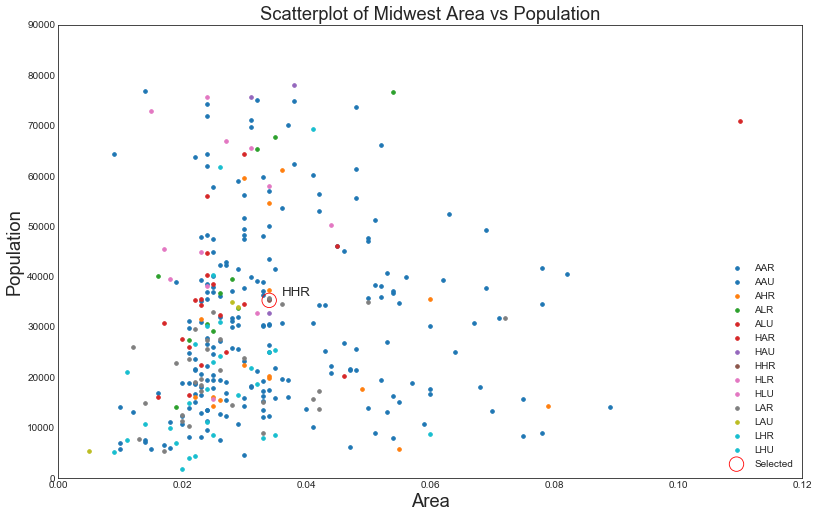

In [174]:
plt.figure(figsize=(16, 10)   #绘图尺寸
           , dpi=60           #图像分辨率
           , facecolor='w'    #图像的背景颜色，设置为白色，默认也是白色
           , edgecolor='k'    #图像的边框颜色，设置为黑色，默认也是黑色
          )

#进行循环绘图
for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', 
                data=midwest.loc[midwest.category==category, :],
                s=20, c=np.array(plt.cm.tab10(i/float(len(categories)-1))).reshape(1,-1),label=str(category))

#高学历，高贫困的地方
plt.scatter("area","poptotal",
           data = midwest.loc[midwest.category == "HHR",:],
            s=300,
            facecolors="None",
            edgecolors="red",
            label = "Selected")

#低学历，很贫困的地方
#plt.scatter("area","poptotal",
#           data = midwest.loc[midwest.category == "LHR",:],
#            s=150,
#            facecolors="None", #点的填充颜色，为None的时候，表示点是透明的
#            edgecolors="red", #点的边框现在是红色
#           label = "Selected")

#再试试看，高学历，高贫困的地方？
#学历低，但很富有的地方？



# 拓展，点加文本
plt.annotate("HHR",xy=(midwest.loc[midwest["category"]== "HHR","area"]
                ,midwest.loc[midwest["category"]== "HHR","poptotal"]),xytext=(midwest.loc[midwest["category"]== "HHR","area"]+0.002
                ,midwest.loc[midwest["category"]== "HHR","poptotal"]+1000),fontsize=16)
# 加箭头,arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color="b")，加圈不加箭头


#对图像进行装饰
plt.gca().set(xlim=(0.0, 0.12), ylim=(0, 90000)) #控制横纵坐标的范围
plt.xticks(fontsize=12) #坐标轴上的标尺的字的大小
plt.yticks(fontsize=12)
plt.ylabel('Population',fontsize=22) #坐标轴上的标题和字体大小
plt.xlabel('Area',fontsize=22)
plt.title("Scatterplot of Midwest Area vs Population", fontsize=22) #整个图像的标题和字体的大小
plt.legend(fontsize=12) #图例的字体大小
plt.show()

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

#### 02/50 气泡图

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/02%20%E6%B0%94%E6%B3%A1%E5%9B%BE3.PNG" align="center" />

横坐标依然是面积，纵坐标依然是人口<br>
从01号图散点图的数据解读来看，其实为散点添加不同的颜色是增加图像中的信息维度<br>
而气泡图其实也是一样：通过给散点增加面积信息，来增加图像中的信息维度

### 1. 变散点为气泡 s参数

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
midwest = pd.read_csv("data/midwest_filter.csv")

In [3]:
midwest.head()

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU,319.823487
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR,130.442161


In [4]:
midwest.columns

Index(['PID', 'county', 'state', 'area', 'poptotal', 'popdensity', 'popwhite',
       'popblack', 'popamerindian', 'popasian', 'popother', 'percwhite',
       'percblack', 'percamerindan', 'percasian', 'percother', 'popadults',
       'perchsd', 'percollege', 'percprof', 'poppovertyknown',
       'percpovertyknown', 'percbelowpoverty', 'percchildbelowpovert',
       'percadultpoverty', 'percelderlypoverty', 'inmetro', 'category',
       'dot_size'],
      dtype='object')

In [5]:
midwest.popasian.max()

2178

In [6]:
midwest.popasian.min()

0

In [7]:
midwest.percasian.min()

0.0

In [8]:
midwest.percasian.max()

3.56657442

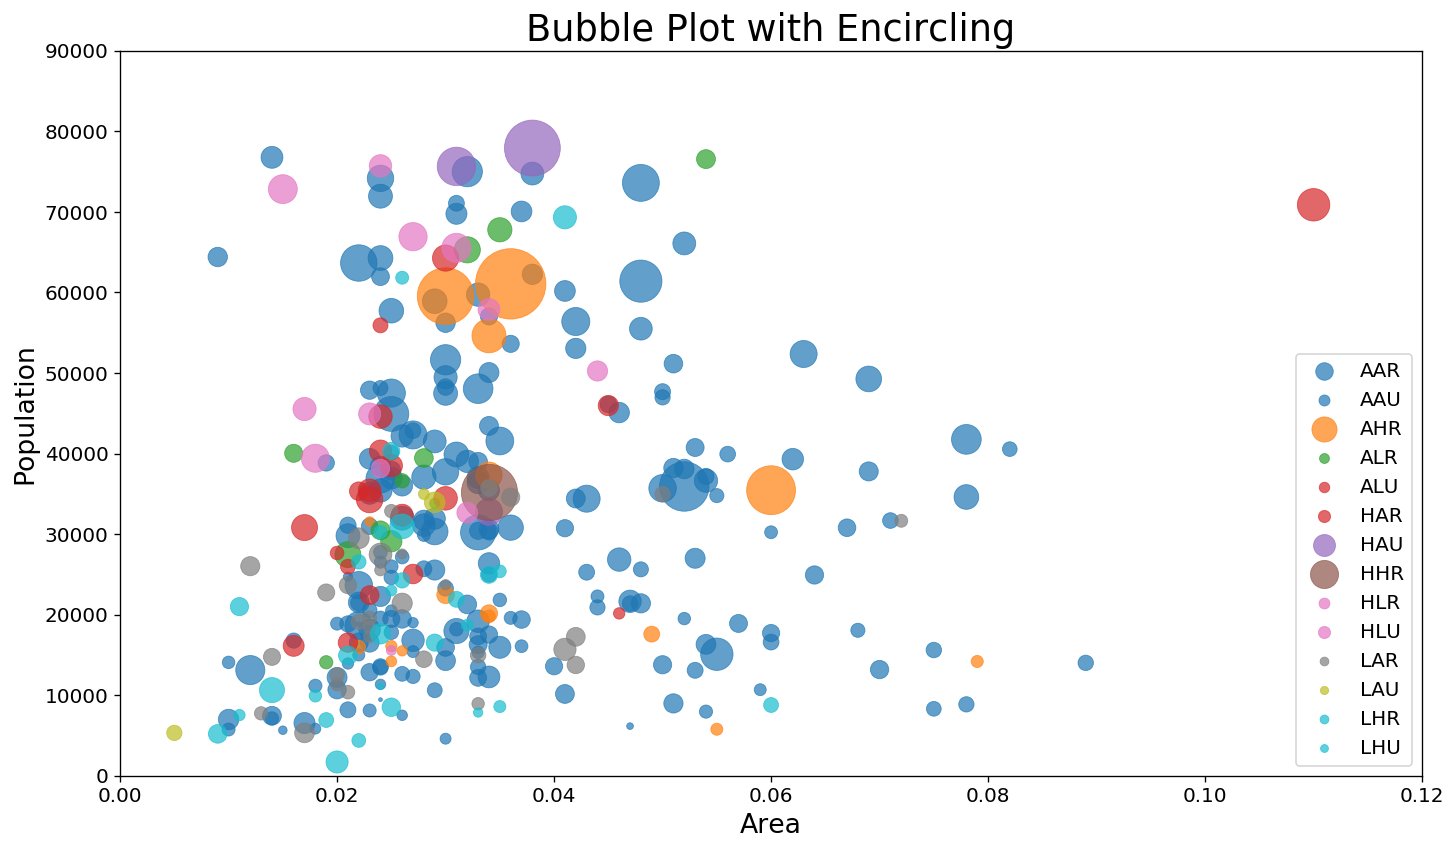

In [11]:
#plt.style.use('seaborn-whitegrid')
#sns.set_style("white")

#预设图像的各种属性
large = 22; med = 16; small = 12
params = {'axes.titlesize': large, #子图上的标题字体大小
          'legend.fontsize': med, #图例的字体大小
          'figure.figsize': (16, 10), #图像的画布大小
          'axes.labelsize': med, #标签的字体大小
          'xtick.labelsize': med, #x轴上的标尺的字体大小
          'ytick.labelsize': med, #y轴上的标尺的字体大小
          'figure.titlesize': large} #整个画布的标题字体大小
plt.rcParams.update(params) #设定各种各样的默认属性
#plt.style.use('seaborn-whitegrid') #设定整体风格
#sns.set_style("white") #设定整体背景风格

%matplotlib inline

#准备标签列表
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

#布置画布
fig = plt.figure(figsize=(14,8), dpi=120, facecolor='w', edgecolor='k')    

#循环绘图
#之前在给散点加入颜色的时候，我们提到X轴，Y轴上的值和我们的颜色是一一对应的
#那只要点的尺寸和我们的坐标点(x1,x2)一一对应，那我们就可以相应地给每一个点添加尺寸信息
for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', data=midwest.loc[midwest.category==category, :]
                , s = midwest.loc[midwest.category==category, "percasian"]*500 #调整尺寸，让散点图成为气泡图，特征为比例的500倍
                #, s = "popasian" #现在的特征为我们的点的尺寸大小，亚洲人口，另一个特征
                #, s=20 #size
                , c= np.array(colors[i]).reshape(1,-1)
                , label=str(category)
                , edgecolors = np.array(colors[i]).reshape(1,-1) #点的边缘的颜色
                #, edgecolors="k"
                , alpha = 0.7 #图像的透明度，点的透明度
                , linewidths=0.5 #点的外圈的线条的宽度
               )

#装饰图像
plt.gca().set(xlim=(0.0, 0.12), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Bubble Plot with Encircling", fontsize=22)
plt.legend(fontsize=12
           ,markerscale=0.5 #现有的图例气泡的某个比例
          )
plt.show()

# 可以看出越高越大

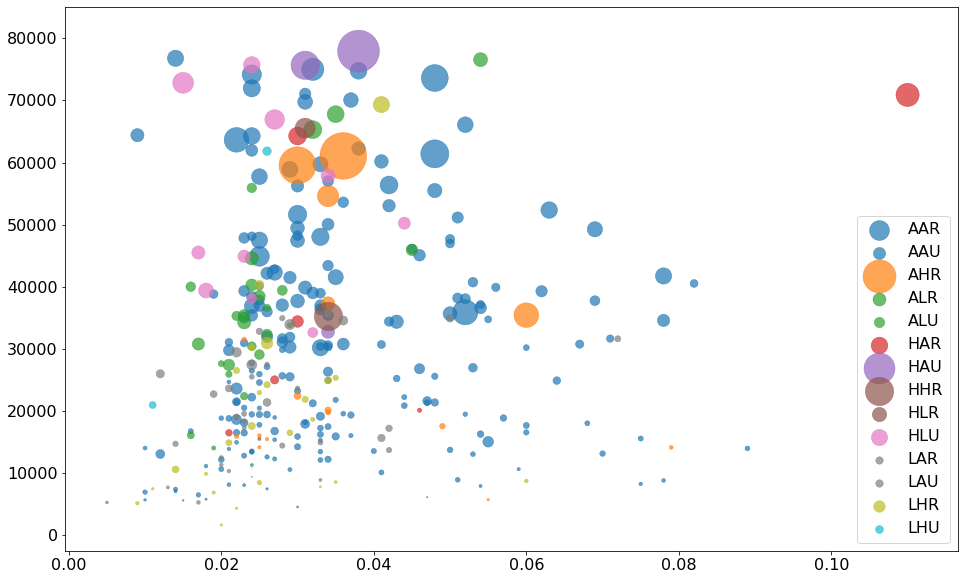

In [12]:
#如果使用另外一种循环？
plt.figure(figsize=(16,10))

for i in range(len(categories)):
    plt.scatter(midwest.loc[midwest["category"]==categories[i],"area"]
                ,midwest.loc[midwest["category"]==categories[i],"poptotal"]
                #,s=midwest.loc[:,"popasian"] 
                ,s=midwest.loc[midwest["category"]==categories[i],"popasian"] 
                ,c=np.array(plt.cm.tab10(i/len(categories))).reshape(1,-1)
                ,label=categories[i]
                ,alpha = 0.7 #图像的透明度，点的透明度
                , linewidths=0.5 #点的外圈的线条的宽度
               )
plt.legend()
plt.show()

In [13]:
midwest.loc[midwest["category"]==categories[0],"area"].shape

(186,)

In [14]:
midwest.loc[midwest["category"]==categories[0],"popasian"].shape

(186,)

In [15]:
midwest.loc[:,"popasian"].shape #参数s里面可以输入和我们的坐标点长度不一致的序列

(332,)

*参数s中可能出现的陷阱，自动补全*

In [3]:
X = np.arange(0,10,1) #10行

In [4]:
X

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
y = [0,0,0,0,0,1,1,1,1,1]

In [6]:
#sizes1 = [50,50,50,50,50,100,100,100,100,100]
#sizes2 = [50,50,50,50,50,100,100,100,100,100,200,200,200]
#sizes2 = [50,50,50,50,50,100,100,200,200,200,100,100,100]
sizes2 = [50,100,200]  #间断出现

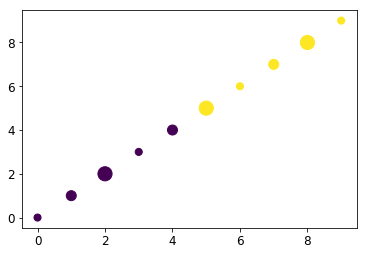

In [27]:
plt.scatter(X,X #横坐标，纵坐标,对角线
            #,s=sizes1
            ,s=sizes2 #如果输入了比原始数据更加长的序列，则我们的参数只会截取到和横坐标/纵坐标一样长的对应的尺寸
            ,c=y
           )

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

*气泡图中的图例相关问题*

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/%E5%88%AB%E4%BA%BA%E5%AE%B6%E7%9A%84%E6%B0%94%E6%B3%A1%E5%9B%BE1111.PNG" align="center" />

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/%E5%88%AB%E4%BA%BA%E5%AE%B6%E7%9A%84%E6%B0%94%E6%B3%A1%E5%9B%BE2222.PNG" align="center" />

## 加文本

In [7]:
X = np.arange(0,10,1)

In [8]:
X

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Text(3.1, 3.1, 'ha')

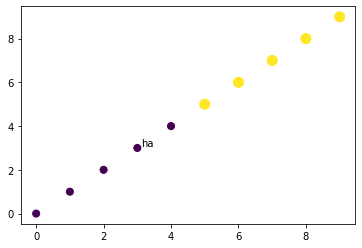

In [12]:
y = [0,0,0,0,0,1,1,1,1,1]
sizes1 = [50,50,50,50,50,100,100,100,100,100]

plt.scatter(X,X #横坐标，纵坐标
            ,s=sizes1   # 大小
            ,c=y
           )
plt.text(X[3]+0.1,X[3]+0.1   # 只能为一个点
       #,s=["ha","ha","ha","ha","ha","hei","hei","hei","hei","hei"] #不是size的s，而是我们的字符串string的简称s，同label
        ,s="ha"    #文本 
        )

#我们可以让尺寸一一与坐标点对应，但是却无法让坐标点的名字一一与坐标点对应
#这就有点像图例必须进行循环一样，给每一个气泡添加名字，也必须在每个气泡上进行循环
#shift+M合并上下cell

In [15]:
midwest.county # 取一列

0            ADAMS
1        ALEXANDER
2             BOND
3            BOONE
4            BROWN
5           BUREAU
6          CALHOUN
7          CARROLL
8             CASS
9        CHRISTIAN
10           CLARK
11            CLAY
12         CLINTON
13           COLES
14        CRAWFORD
15      CUMBERLAND
16         DE KALB
17         DE WITT
18         DOUGLAS
19           EDGAR
20         EDWARDS
21       EFFINGHAM
22         FAYETTE
23            FORD
24        FRANKLIN
25          FULTON
26        GALLATIN
27          GREENE
28          GRUNDY
29        HAMILTON
          ...     
302      LAFAYETTE
303       LANGLADE
304        LINCOLN
305      MARINETTE
306      MARQUETTE
307      MENOMINEE
308         MONROE
309         OCONTO
310         ONEIDA
311        OZAUKEE
312          PEPIN
313         PIERCE
314           POLK
315        PORTAGE
316          PRICE
317       RICHLAND
318           RUSK
319       ST CROIX
320           SAUK
321         SAWYER
322        SHAWANO
323         

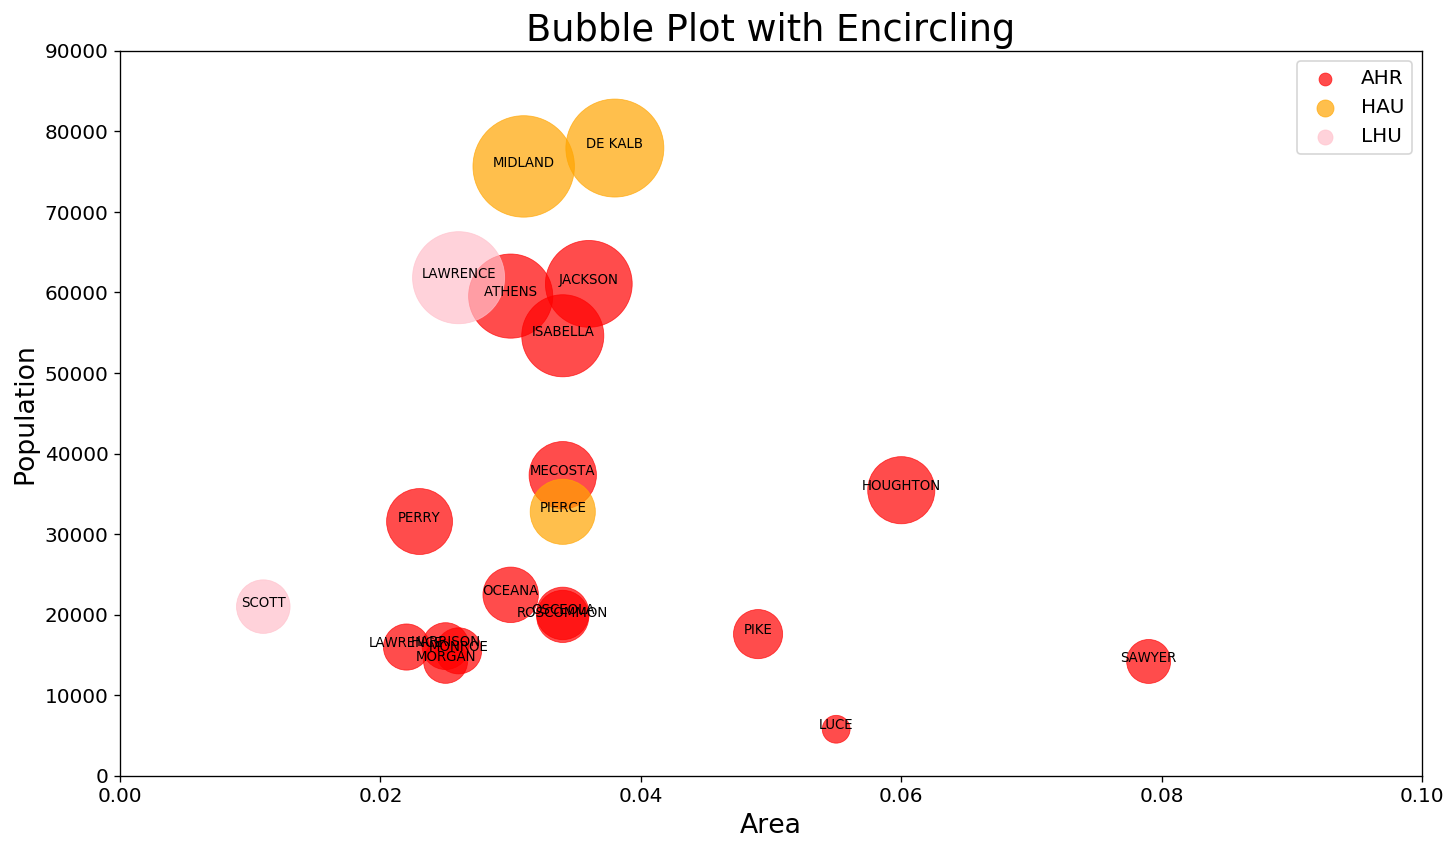

In [5]:
#plt.style.use('seaborn-whitegrid')
#sns.set_style("white")

#预设图像的各种属性
large = 22; med = 16; small = 12
params = {'axes.titlesize': large, #子图上的标题字体大小
          'legend.fontsize': med, #图例的字体大小
          'figure.figsize': (16, 10), #图像的画布大小
          'axes.labelsize': med, #标签的字体大小
          'xtick.labelsize': med, #x轴上的标尺的字体大小
          'ytick.labelsize': med, #y轴上的标尺的字体大小
          'figure.titlesize': large} #整个画布的标题字体大小
plt.rcParams.update(params) #设定各种各样的默认属性
#plt.style.use('seaborn-whitegrid') #设定整体风格
#sns.set_style("white") #设定整体背景风格

%matplotlib inline

#准备标签列表
categories = np.unique(midwest['category'])
colors = ["red","orange","pink"]

#布置画布
fig = plt.figure(figsize=(14,8), dpi=120, facecolor='w', edgecolor='k')    

#循环绘图
for i, category in enumerate(["AHR","HAU","LHU"]):  # 取3个类，类太多不便
    data_ = midwest.loc[midwest.category==category, :]
    data_.index = range(data_.shape[0]) # 恢复索引
    plt.scatter('area', 'poptotal', data=data_
                , s= midwest.loc[midwest.category==category, "poppovertyknown"]*0.05 #调整尺寸，让散点图成为气泡图
                , c= colors[i]
                , label=str(category)
                , edgecolors= colors[i]
                , alpha = 0.7
                , linewidths=.5
               )
    for i in range(midwest.loc[midwest.category==category, :].shape[0]):
        plt.text(data_.loc[i,"area"]
                 ,data_.loc[i,"poptotal"]
                 ,s=data_.loc[i,"county"] #虽然参数都写作s，但这里的s指的是字符串string的s，不是size的s
                 ,fontdict={"fontsize":8} #调整我们的字符串的字体大小
                 ,horizontalalignment='center' #相对于我的气泡，把我的字符串显示在哪里
                )
        
#装饰图像
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Bubble Plot with Encircling", fontsize=22)
lgnd = plt.legend(fontsize=12
                  ,markerscale=0.2
                 )
plt.show()

In [ ]:
#解读图像：试试看输入不同的s的值，会得出什么结论呢？

### 2. 将散点框起来

什么时候会存在这样的需求呢？来看一组数据：

In [18]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(1) #随机模式1号

#random.randn 取出符合标准正态分布的随机数
#random.normal 取出符合正态分布的随机数
x1, y1 = np.random.normal(loc=5 #正态分布中的均值
                          , scale=2 #正态分布中的方差
                          , size=(2,15) #生成怎样的数据结构，2列，每列15个数据
                         )

In [19]:
x1.shape

(15,)

In [20]:
y1.shape

(15,)

In [21]:
x2, y2 = np.random.normal(loc=8
                          , scale=2.5
                          , size=(2,13))

In [22]:
x2.shape

(13,)

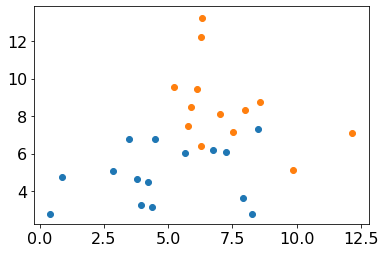

In [23]:
plt.scatter(x1, y1)
plt.scatter(x2, y2)
plt.show()

我们希望能够绘制一个边界，将同一类的点框起来。<br>
在这里我们将用到SciPy库，这是一个专为Python设计的，专注于数学&工程学的库<br>
今天我们将用到SciPy中专门处理空间算法和数据结构的模块：SciPy库中的spatial

### **scipy.spatial.ConvexHull()**

ConvexHull直译是凸包，表示在一个平面上，我们能找到的最小的将一组数据全部包括在内的凸集<br>
通俗的来说凸包就是包围一组散点的最小凸边形<br>
相对的我们也有凹边形

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/%E5%87%B8%E5%8C%85%20vs%20%E5%87%B9%E5%8C%85.PNG" align="center" />

类**ConvexHull**能够帮助我们创建N维凸包<br>
> **重要参数**
>> **points**：浮点数组成的n维数组，结构为(点的个数，维度)。表示用来构成凸包的坐标点。全部数。<br>
>> **incremental**：布尔值，可不填。允许不断向类中添加新的数据点。<br>

> **重要属性**<br>
>> **vertices**：组成凸包的那些数据点在原数据中的索引

*更多参数和属性走：https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.spatial.ConvexHull.html

In [26]:
from scipy.spatial import ConvexHull
from matplotlib import patches
#patches，给现有图像打补丁的包，在现有的图像上增加更多的东西

In [27]:
#定义绘制凸包的函数
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca() #获取当前子图，如果当前子图不存在，那就创建新的子图(get current ax)
    p = np.c_[x,y] #.c_功能类似于zip，不过不是生成组合的元祖，而是生成拼接起来的数组array
    hull = ConvexHull(p) #将数据集输入到ConvexHull中，自动生成凸包类型的对象
    poly = plt.Polygon(p[hull.vertices,:], **kw)
        #使用属性vertices调用形成凸包的点的索引，进行切片后，利用绘制多边形的类plt.Polygon将形成凸包的点连起来
        #这里的**kw就是定义函数的时候输入的**kw，里面包含了一系列可以在绘制多边形的类中进行调节的内容
        #包括多边形的边框颜色，填充颜色，透明度等等
    ax.add_patch(poly) #使用add_patch，将生成的多边形作为一个补丁补充到图像上

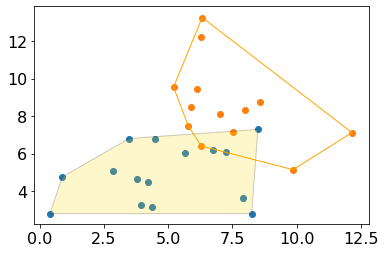

In [28]:
plt.scatter(x1, y1)
plt.scatter(x2, y2)

encircle(x1, y1
         , ec="k" #线条的颜色
         , fc="gold" #多边形的颜色
         , alpha=0.2 #图像整体的透明度
        )
#你是否注意到，边框也是透明的？

encircle(x2, y2, ec="orange", fc="none")

plt.show()

In [60]:
x1

array([8.24869073, 3.77648717, 3.9436565 , 2.85406276, 6.73081526,
       0.39692261, 8.48962353, 3.4775862 , 5.63807819, 4.50125925,
       7.92421587, 0.87971858, 4.35516559, 4.23189129, 7.26753888])

In [61]:
y1

array([2.80021747, 4.65514358, 3.24428316, 5.08442749, 6.16563043,
       2.79876165, 7.28944742, 6.80318144, 6.00498868, 6.8017119 ,
       3.63254428, 4.75421955, 3.12846113, 4.46422384, 6.06071093])

In [63]:
[*zip(x1,y1)]   # 一一对应打包成元组

[(8.248690727326483, 2.8002174653719383),
 (3.7764871726998495, 4.655143584899129),
 (3.9436564954730886, 3.2442831641572565),
 (2.854062755687659, 5.0844274934311855),
 (6.730815258649357, 6.165630427431644),
 (0.39692260623943465, 2.7987616455741575),
 (8.48962352843296, 7.289447419679228),
 (3.4775861982097944, 6.8031814411855915),
 (5.638078192114197, 6.004988677803737),
 (4.50125924904518, 6.801711898528824),
 (7.924215874089948, 3.6325442816513336),
 (0.8797185810046919, 4.754219548962704),
 (4.355165591972985, 3.1284611314818624),
 (4.231891290663169, 4.464223840747968),
 (7.267538884670875, 6.060710933476372)]

In [64]:
p = np.c_[x1,y1] #将两组数据组合起来 zip函数，一一对应打包成列表

In [65]:
p #代表了所有的15个点的坐标

array([[8.24869073, 2.80021747],
       [3.77648717, 4.65514358],
       [3.9436565 , 3.24428316],
       [2.85406276, 5.08442749],
       [6.73081526, 6.16563043],
       [0.39692261, 2.79876165],
       [8.48962353, 7.28944742],
       [3.4775862 , 6.80318144],
       [5.63807819, 6.00498868],
       [4.50125925, 6.8017119 ],
       [7.92421587, 3.63254428],
       [0.87971858, 4.75421955],
       [4.35516559, 3.12846113],
       [4.23189129, 4.46422384],
       [7.26753888, 6.06071093]])

In [70]:
hull = ConvexHull(p)

In [71]:
hull

In [72]:
hull.vertices

array([ 5,  0,  6,  7, 11], dtype=int32)

In [75]:
p[hull.vertices]

array([[0.39692261, 2.79876165],
       [8.24869073, 2.80021747],
       [8.48962353, 7.28944742],
       [3.4775862 , 6.80318144],
       [0.87971858, 4.75421955]])

在计算机视觉技术当中，我们经常需要利用凸包，以帮助计算机识别图像的轮廓：

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/%E5%87%B8.PNG" align="center" />

## 最终成品

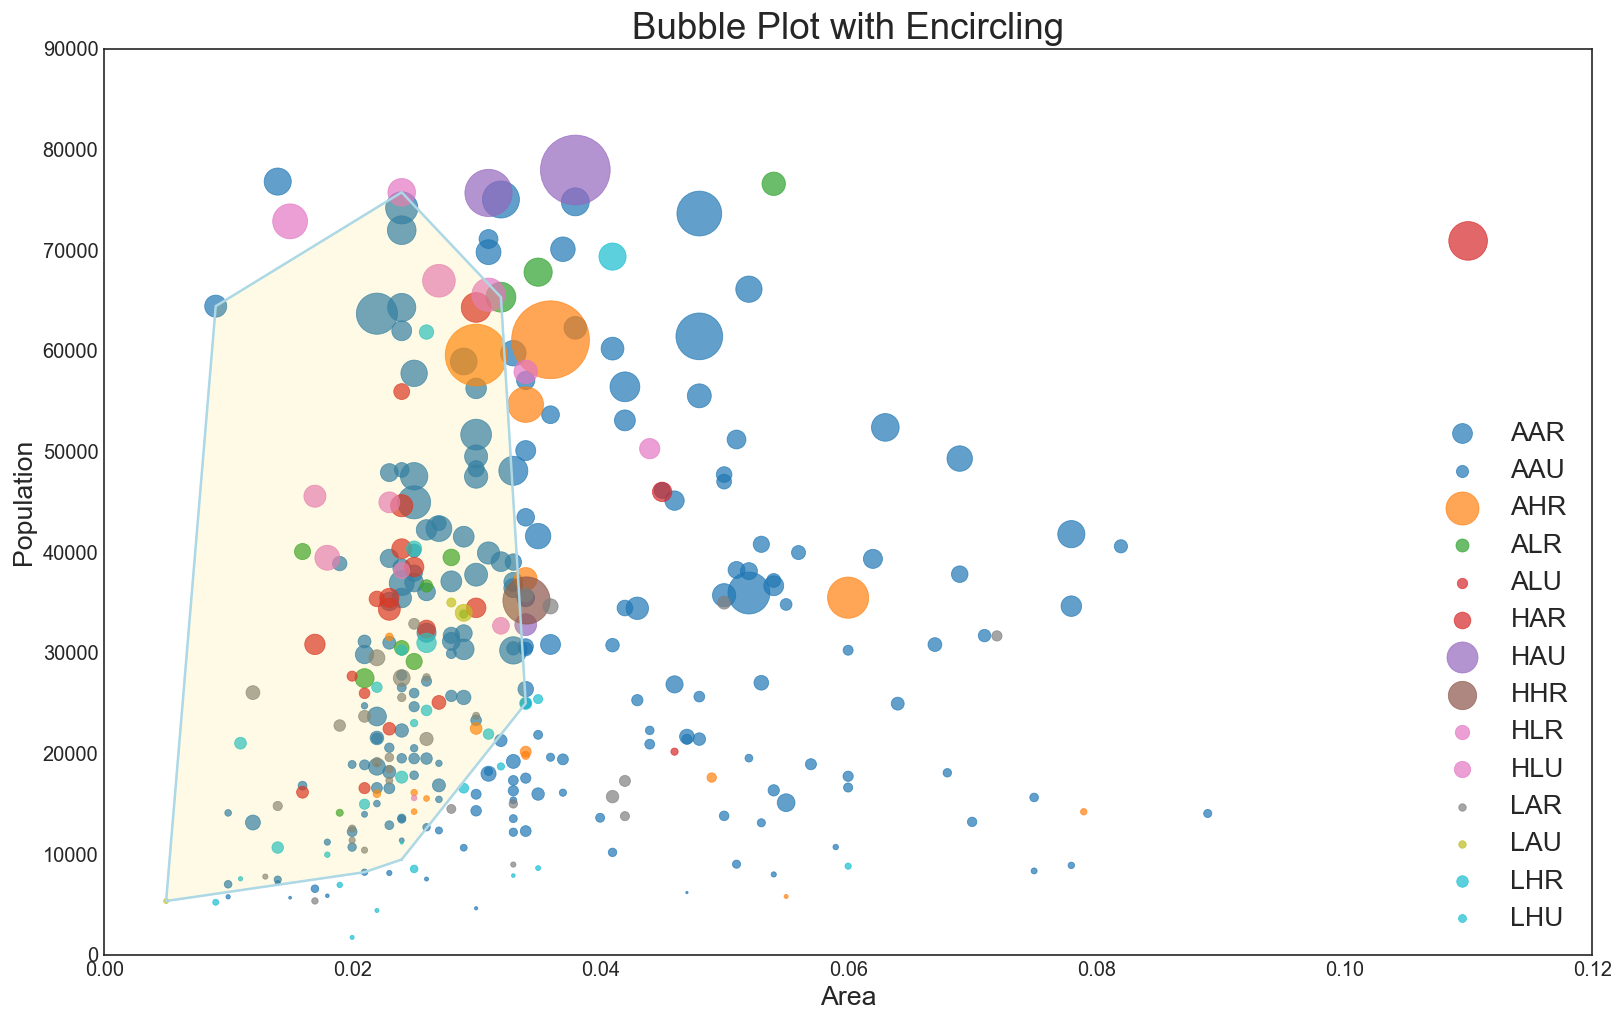

In [29]:
from scipy.spatial import ConvexHull
from matplotlib import patches

plt.style.use('seaborn-whitegrid')
sns.set_style("white")

#预设图像的各种属性
large = 22; med = 16; small = 12
params = {'axes.titlesize': large, #子图上的标题字体大小
          'legend.fontsize': med, #图例的字体大小
          'figure.figsize': (16, 10), #图像的画布大小
          'axes.labelsize': med, #标签的字体大小
          'xtick.labelsize': med, #x轴上的标尺的字体大小
          'ytick.labelsize': med, #y轴上的标尺的字体大小
          'figure.titlesize': large} #整个画布的标题字体大小
plt.rcParams.update(params) #设定各种各样的默认属性
plt.style.use('seaborn-whitegrid') #设定整体风格
sns.set_style("white") #设定整体背景风格

%matplotlib inline

#准备标签列表
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

#布置画布
fig = plt.figure(figsize=(16, 10), dpi=120, facecolor='w', edgecolor='k')    

#循环绘图
for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', data=midwest.loc[midwest.category==category, :]
                , s="popasian" #调整尺寸，让散点图成为气泡图
                , c= np.array(colors[i]).reshape(1,-1)
                , label=str(category)
                , edgecolors= np.array(colors[i]).reshape(1,-1)
                , alpha = 0.7
                , linewidths=.5)

#绘制凸包

#定义函数
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

#定义需要被框起来的数据：所有在IN州中的城市
midwest_encircle_data = midwest.loc[midwest.state=='IN', :]                  

#使用函数绘制

#这里绘制的是金色的面
encircle(midwest_encircle_data.area
         , midwest_encircle_data.poptotal
         , ec="k"
         , fc="gold"
         , alpha=0.1
        ) 

#这里绘制的是浅蓝色的线，而面是透明的
encircle(midwest_encircle_data.area
         , midwest_encircle_data.poptotal
         , ec="lightblue" #线条颜色
         , fc="none" #填充颜色
         , linewidth=1.5 #线宽
        )
        
#装饰图像
plt.gca().set(xlim=(0.0, 0.12), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Bubble Plot with Encircling", fontsize=22)
plt.legend(markerscale=0.6)
plt.show()

# end